In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mass = 1000
vi = 0
dt = 0.1
cd = 0.1

In [3]:
def velocity(throttle, current):
    #print(throttle, current)
    F = throttle - cd * current ** 2
    a = F/mass
    vf = current + a * dt # + np.random.normal(0, 0.1)
    return vf

In [4]:
kp = 300
ki = 1.5
kd = 45

In [5]:
# Variables to store previous values
prev_error = 0
integral = 0

# to store historical dataset
error_dist_hist = []
error_speed_hist = []

# define min-max range 
min_distance, max_distance = -1000, 1000  
min_speed, max_speed = -100, 100        

def controller(target_speed, current_speed, obstacle_at, current_distance, dt):
    global prev_error, integral, error_dist_hist, error_speed_hist  # Keep values across function calls

    
    # Compute error
    error_distance = obstacle_at - 100 - current_distance # weighted combination: scale distance error 
    error_dist_hist.append(error_distance)
    normalised_e_dist = (error_distance - min_distance)/(max_distance - min_distance) * 0.7
    
    error_speed = max(target_speed - current_speed,0)
    error_speed_hist.append(error_speed)
    normalised_e_speed = (error_speed - min_speed)/(max_speed - min_speed) #* 1.5
    
    error = normalised_e_dist*normalised_e_speed + normalised_e_dist
    
    # print(normalised_e_dist, normalised_e_speed, error)
    
    # Proportional term
    p = error
    
    # Integral term (accumulate over time)
    integral += error * dt
    
    # Derivative term (rate of change of error)
    d = (error - prev_error) / dt if dt > 0 else 0 
    
    # Compute PID output
    output = (kp * p) + (ki * integral) + (kd * d)
    
    # Store error for next derivative calculation
    prev_error = error

    return output

In [6]:
target_speed = 80
current_speed = vi

current_distance = 0 
obstacle_at = 6000

result = [] 
for t in np.arange(0, 500, dt):

    # stopping condition
    if current_distance >= obstacle_at:
        break
    
    throttle = controller(target_speed, current_speed, obstacle_at, current_distance, dt)
    # print(throttle)
    current_speed = velocity(throttle, current_speed)

    current_distance += current_speed * dt
    # print(current_distance)
    result.append([t, throttle, current_distance, current_speed])

2.415 0.9 4.5885
2.4149879527785374 0.8982789683625001 4.584320839608308
2.414971093828107 0.8975915785099837 4.58262880999326
2.414949418641969 0.8969035448374126 4.580926112825
2.4149229266727956 0.8962154329752385 4.579214123002686
2.414891617395014 0.895527246031152 4.5774928569844855
2.414855490306935 0.8948389874173088 4.575762332012321
2.4148145449307457 0.8941506605443469 4.574022565372669
2.414768780812496 0.893462268821506 4.57227357439657
2.414718197522092 0.892773815656583 4.5705153764592765
2.4146627946532835 0.8920853044558861 4.568747988979858
2.4146025718236523 0.8913967386241896 4.566971429420836
2.4145375286746056 0.8907081215646891 4.565185715287811
2.4144676648713586 0.8900194566789562 4.563390864129073
2.4143929801029262 0.8893307473668934 4.561586893535242
2.414313474082113 0.8886419970266891 4.559773821138886
2.4142291465454964 0.8879532090547729 4.557951664614135
2.414139997253417 0.8872643868457704 4.55612044167632
2.4140460259899643 0.8865755337924591 4.554280

In [7]:
# target_speeds = [80, 100, 50]  
# time_range_set = [(0, 100), (100, 150), (150, 250)] 

# current = vi
# result = []

# for i, target in enumerate(target_speeds):
#     t_init, t_end = time_range_set[i] 
#     initial_dist = 2000
#     previous_speed = current
#     # Reset initial distance for each segment
      
    
#     for t in np.arange(t_init, t_end, dt):
#         dist_remaining = initial_dist - current * (t - t_init)  # Distance remaining

#         # Stop the car if it reaches obstacle
#         if dist_remaining <= 0:
#             current = 0  
#             break
        
#         # slow down car when within 10 % of the target
#         if dist_remaining < (0.1 * initial_dist):
#             throttle = max(throttle - (0.005 * throttle), 0)

#         throttle = controller(target, current, dt)
#         current = max(velocity(throttle, current), 0)

#         result.append([t, throttle, current])

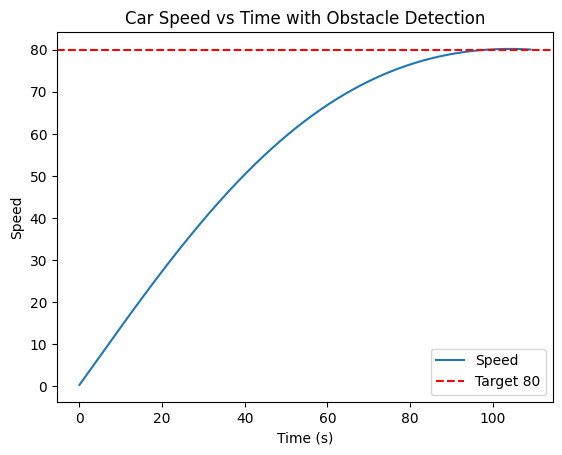

In [8]:
r = np.array(result)
plt.plot(r[:, 0], r[:, 3], label="Speed")
plt.axhline(80, color="red", linestyle="dashed", label="Target 80")
# plt.axhline(100, color="green", linestyle="dashed", label="Target 100")
# plt.axhline(50, color="yellow", linestyle="dashed", label="Target 50")

plt.xlabel("Time (s)")
plt.ylabel("Speed")
plt.legend()
plt.title("Car Speed vs Time with Obstacle Detection")
plt.show()

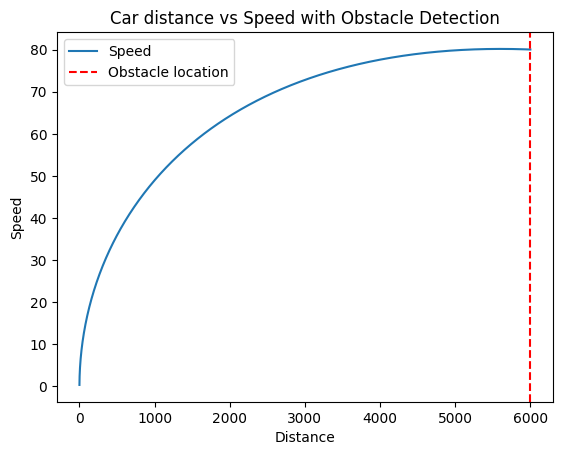

In [9]:
r = np.array(result)
plt.plot(r[:, 2], r[:, 3], label="Speed")
plt.axvline(obstacle_at, color="red", linestyle="dashed", label="Obstacle location")
# plt.axhline(80, color="red", linestyle="dashed", label="Target 80")
# plt.axhline(100, color="green", linestyle="dashed", label="Target 100")
# plt.axhline(50, color="yellow", linestyle="dashed", label="Target 50")

plt.xlabel("Distance")
plt.ylabel("Speed")
plt.legend()
plt.title("Car distance vs Speed with Obstacle Detection")
plt.show()

In [10]:
np.set_printoptions(suppress=True, precision=1, threshold=1000)
r

array([[   0. , 3442.1,    0. ,    0.3],
       [   0.1, 1374.8,    0.1,    0.5],
       [   0.2, 1376.1,    0.1,    0.6],
       ...,
       [ 108.9,  587. , 5985.6,   80. ],
       [ 109. ,  585.8, 5993.6,   80. ],
       [ 109.1,  584.6, 6001.6,   80. ]], shape=(1092, 4))

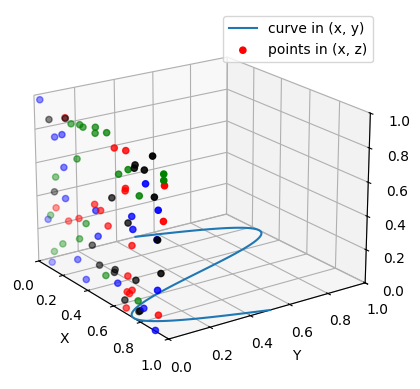

In [11]:
ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()